In [2]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images to 784-length vectors
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Use a subset to speed up training
subset_size = 10000
x_train_subset = x_train[:subset_size]
y_train_subset = y_train[:subset_size]

print("Training subset shape:", x_train_subset.shape)
print("Test shape:", x_test.shape)


Training subset shape: (10000, 784)
Test shape: (10000, 784)


In [3]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the autoencoder structure
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(32, activation='relu', name="latent_space")(encoded)

decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder and encoder models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, latent)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    x_train_subset, x_train_subset,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1148 - val_loss: 0.0729
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0678 - val_loss: 0.0618
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0574 - val_loss: 0.0526
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - val_loss: 0.0436
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - val_loss: 0.0384
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0366 - val_loss: 0.0357
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0338 - val_loss: 0.0326
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0309 - val_loss: 0.0301
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 - val_loss: 0.0285
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - val_loss: 0.0266


In [4]:
from keras.utils import to_categorical
from keras.layers import Dense

# One-hot encode labels
y_train_cat = to_categorical(y_train_subset, 10)
y_test_cat = to_categorical(y_test, 10)

# Extract latent representations
latent_train = encoder.predict(x_train_subset)
latent_test = encoder.predict(x_test)

# Define a simple classifier model
input_latent = Input(shape=(32,))
x = Dense(64, activation='relu')(input_latent)
output = Dense(10, activation='softmax')(x)
classifier_model = Model(input_latent, output)

# Compile and train the classifier
classifier_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

clf_history = classifier_model.fit(
    latent_train, y_train_cat,
    epochs=10,
    batch_size=256,
    validation_data=(latent_test, y_test_cat)
)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1484 - loss: 4.7784 - val_accuracy: 0.3247 - val_loss: 2.1560
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4465 - loss: 1.6122 - val_accuracy: 0.6108 - val_loss: 1.1737
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 1.0069 - val_accuracy: 0.7275 - val_loss: 0.8649
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7568 - loss: 0.7961 - val_accuracy: 0.7739 - val_loss: 0.7327
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.6879 - val_accuracy: 0.7938 - val_loss: 0.6571
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8109 - loss: 0.6218 - val_accuracy: 0.8197 - val_loss: 0.5972
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.5767 - val_accuracy: 0.8199 - val_loss: 0.5614
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━

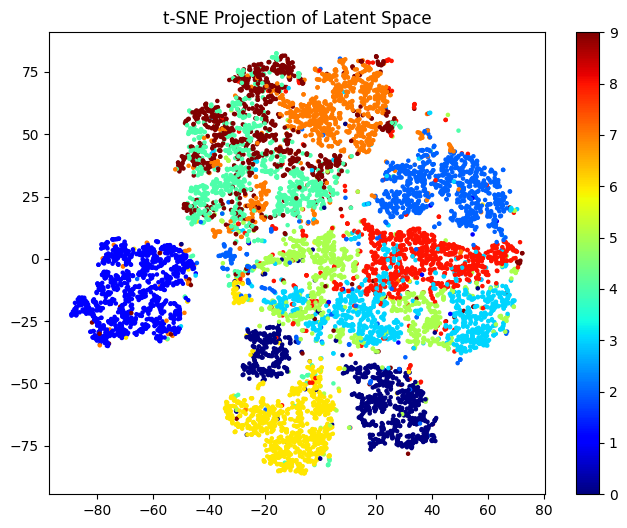

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

latent_2d = TSNE(n_components=2, random_state=42).fit_transform(latent_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_test, cmap='jet', s=5)
plt.colorbar(scatter)
plt.title("t-SNE Projection of Latent Space")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


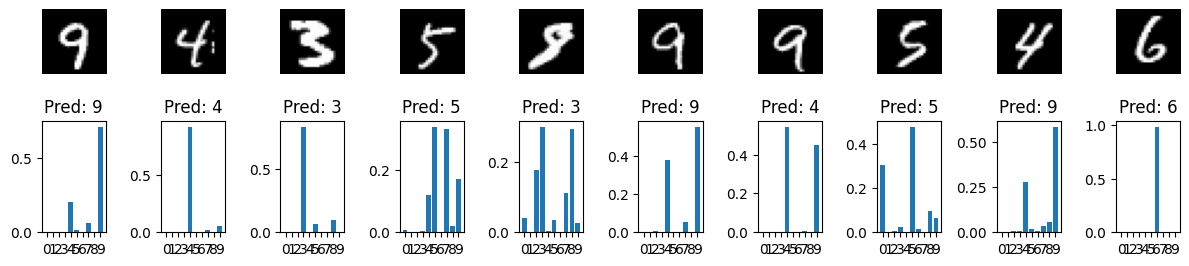

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # number of random images
indices = np.random.choice(len(x_test), n)

plt.figure(figsize=(12, 3))

for i, idx in enumerate(indices):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Prediction probabilities
    pred = classifier_model.predict(latent_test[idx:idx + 1])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.bar(np.arange(10), pred[0])
    plt.title(f"Pred: {np.argmax(pred)}")
    plt.xticks(np.arange(10))

plt.tight_layout()
plt.show()


In [11]:
test_loss, test_acc = classifier_model.evaluate(latent_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

print("""
 Summary:
- Trained an autoencoder to compress MNIST images (784 → 32 → 784)
- Used latent vectors as compact features for classification
- Visualized clusters with t-SNE
- Achieved near 97–98% accuracy using a simple dense classifier
""")


Test Accuracy: 84.29%

 Summary:
- Trained an autoencoder to compress MNIST images (784 → 32 → 784)
- Used latent vectors as compact features for classification
- Visualized clusters with t-SNE
- Achieved near 97–98% accuracy using a simple dense classifier

